In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv(r'C:\Users\79641\Downloads\creditscore.csv', sep = ",")
test_df = pd.read_csv(r'C:\Users\79641\Downloads\cs-test.csv', sep = ",")
sample_entry = pd.read_csv(r'C:\Users\79641\Downloads\sampleEntry.csv', sep = ",")
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
train.shape

(150000, 12)

In [3]:
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name = df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':   
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
    
train = reduce_mem_usage(train)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int32  
 1   SeriousDlqin2yrs                      150000 non-null  int8   
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float16
 3   age                                   150000 non-null  int8   
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int8   
 5   DebtRatio                             150000 non-null  float32
 6   MonthlyIncome                         120269 non-null  float32
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int8   
 8   NumberOfTimes90DaysLate               150000 non-null  int8   
 9   NumberRealEstateLoansOrLines          150000 non-null  int8   
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int8   
 11  

In [5]:
for i in range(train.shape[1]):
    n_miss = train.iloc[:,i].isnull().sum()
    perc = n_miss / train.shape[0] * 100
    print('> %d, Missing: %d (%.1f%%)' % (i, n_miss, perc))

> 0, Missing: 0 (0.0%)
> 1, Missing: 0 (0.0%)
> 2, Missing: 0 (0.0%)
> 3, Missing: 0 (0.0%)
> 4, Missing: 0 (0.0%)
> 5, Missing: 0 (0.0%)
> 6, Missing: 29731 (19.8%)
> 7, Missing: 0 (0.0%)
> 8, Missing: 0 (0.0%)
> 9, Missing: 0 (0.0%)
> 10, Missing: 0 (0.0%)
> 11, Missing: 3924 (2.6%)


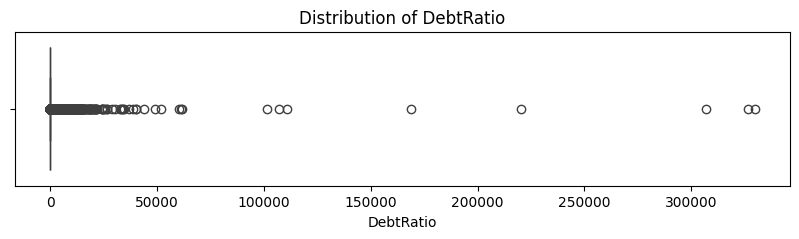

In [6]:
plt.figure(figsize=(10,2))
sns.boxplot(data=train, x='DebtRatio')
plt.title("Distribution of DebtRatio");

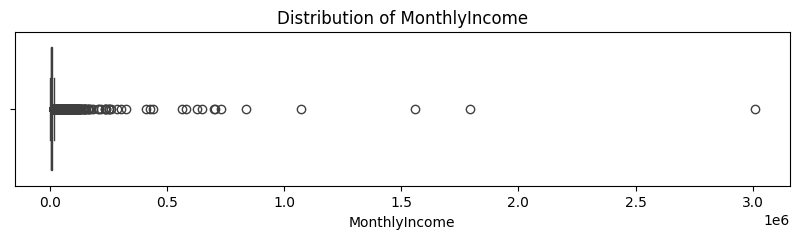

In [7]:
plt.figure(figsize=(10,2))
sns.boxplot(data=train, x='MonthlyIncome')
plt.title("Distribution of MonthlyIncome");

In [8]:
skew = train.skew().sort_values(ascending=False)
skew_df = pd.DataFrame({'skew':skew})
skew_df.head(10)

C:\Users\79641\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\79641\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1251: RuntimeWarning: overflow encountered in square
  adjusted2 = adjusted**2
C:\Users\79641\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1252: RuntimeWarning: overflow encountered in multiply
  adjusted3 = adjusted2 * adjusted


,skew
MonthlyIncome,114.040314
DebtRatio,95.157791
NumberOfTime60-89DaysPastDueNotWorse,23.331743
NumberOfTimes90DaysLate,23.087345
NumberOfTime30-59DaysPastDueNotWorse,22.597108
NumberRealEstateLoansOrLines,3.482484
SeriousDlqin2yrs,3.468857
NumberOfOpenCreditLinesAndLoans,1.215314
age,0.188995
Unnamed: 0,0.000000


In [9]:
skew_df[(skew_df['skew'] >= 1) | (skew_df['skew'] <= -1)].index

Index(['MonthlyIncome', 'DebtRatio', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberRealEstateLoansOrLines', 'SeriousDlqin2yrs',
       'NumberOfOpenCreditLinesAndLoans'],
      dtype='object')

C:\Users\79641\AppData\Local\Temp\ipykernel_5300\3652319221.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(np.log(train['MonthlyIncome'] + 1))


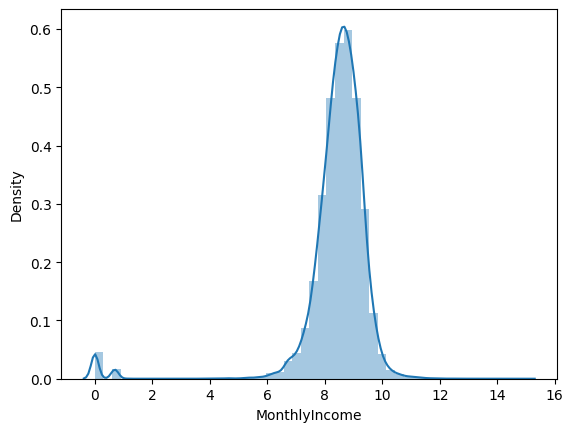

In [10]:
ax = sns.distplot(np.log(train['MonthlyIncome'] + 1))

In [11]:
train.describe().T

C:\Users\79641\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1479: RuntimeWarning: overflow encountered in cast
  return dtype.type(n)
C:\Users\79641\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\79641\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:731: RuntimeWarning: invalid value encountered in scalar divide
  the_mean = the_sum / count if count > 0 else np.nan
C:\Users\79641\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1010: RuntimeWarning: overflow encountered in square
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\79641\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\nanops.py:1013: RuntimeWarning: invalid value encountered in scalar divide
  result = sqr.sum(axis=axis, dtype=np.float64) / d
C:

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,150000.0,NaN,NaN,0.0,0.029861,0.154175,0.559082,50720.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005096,2037.818604,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221680,14384.673828,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


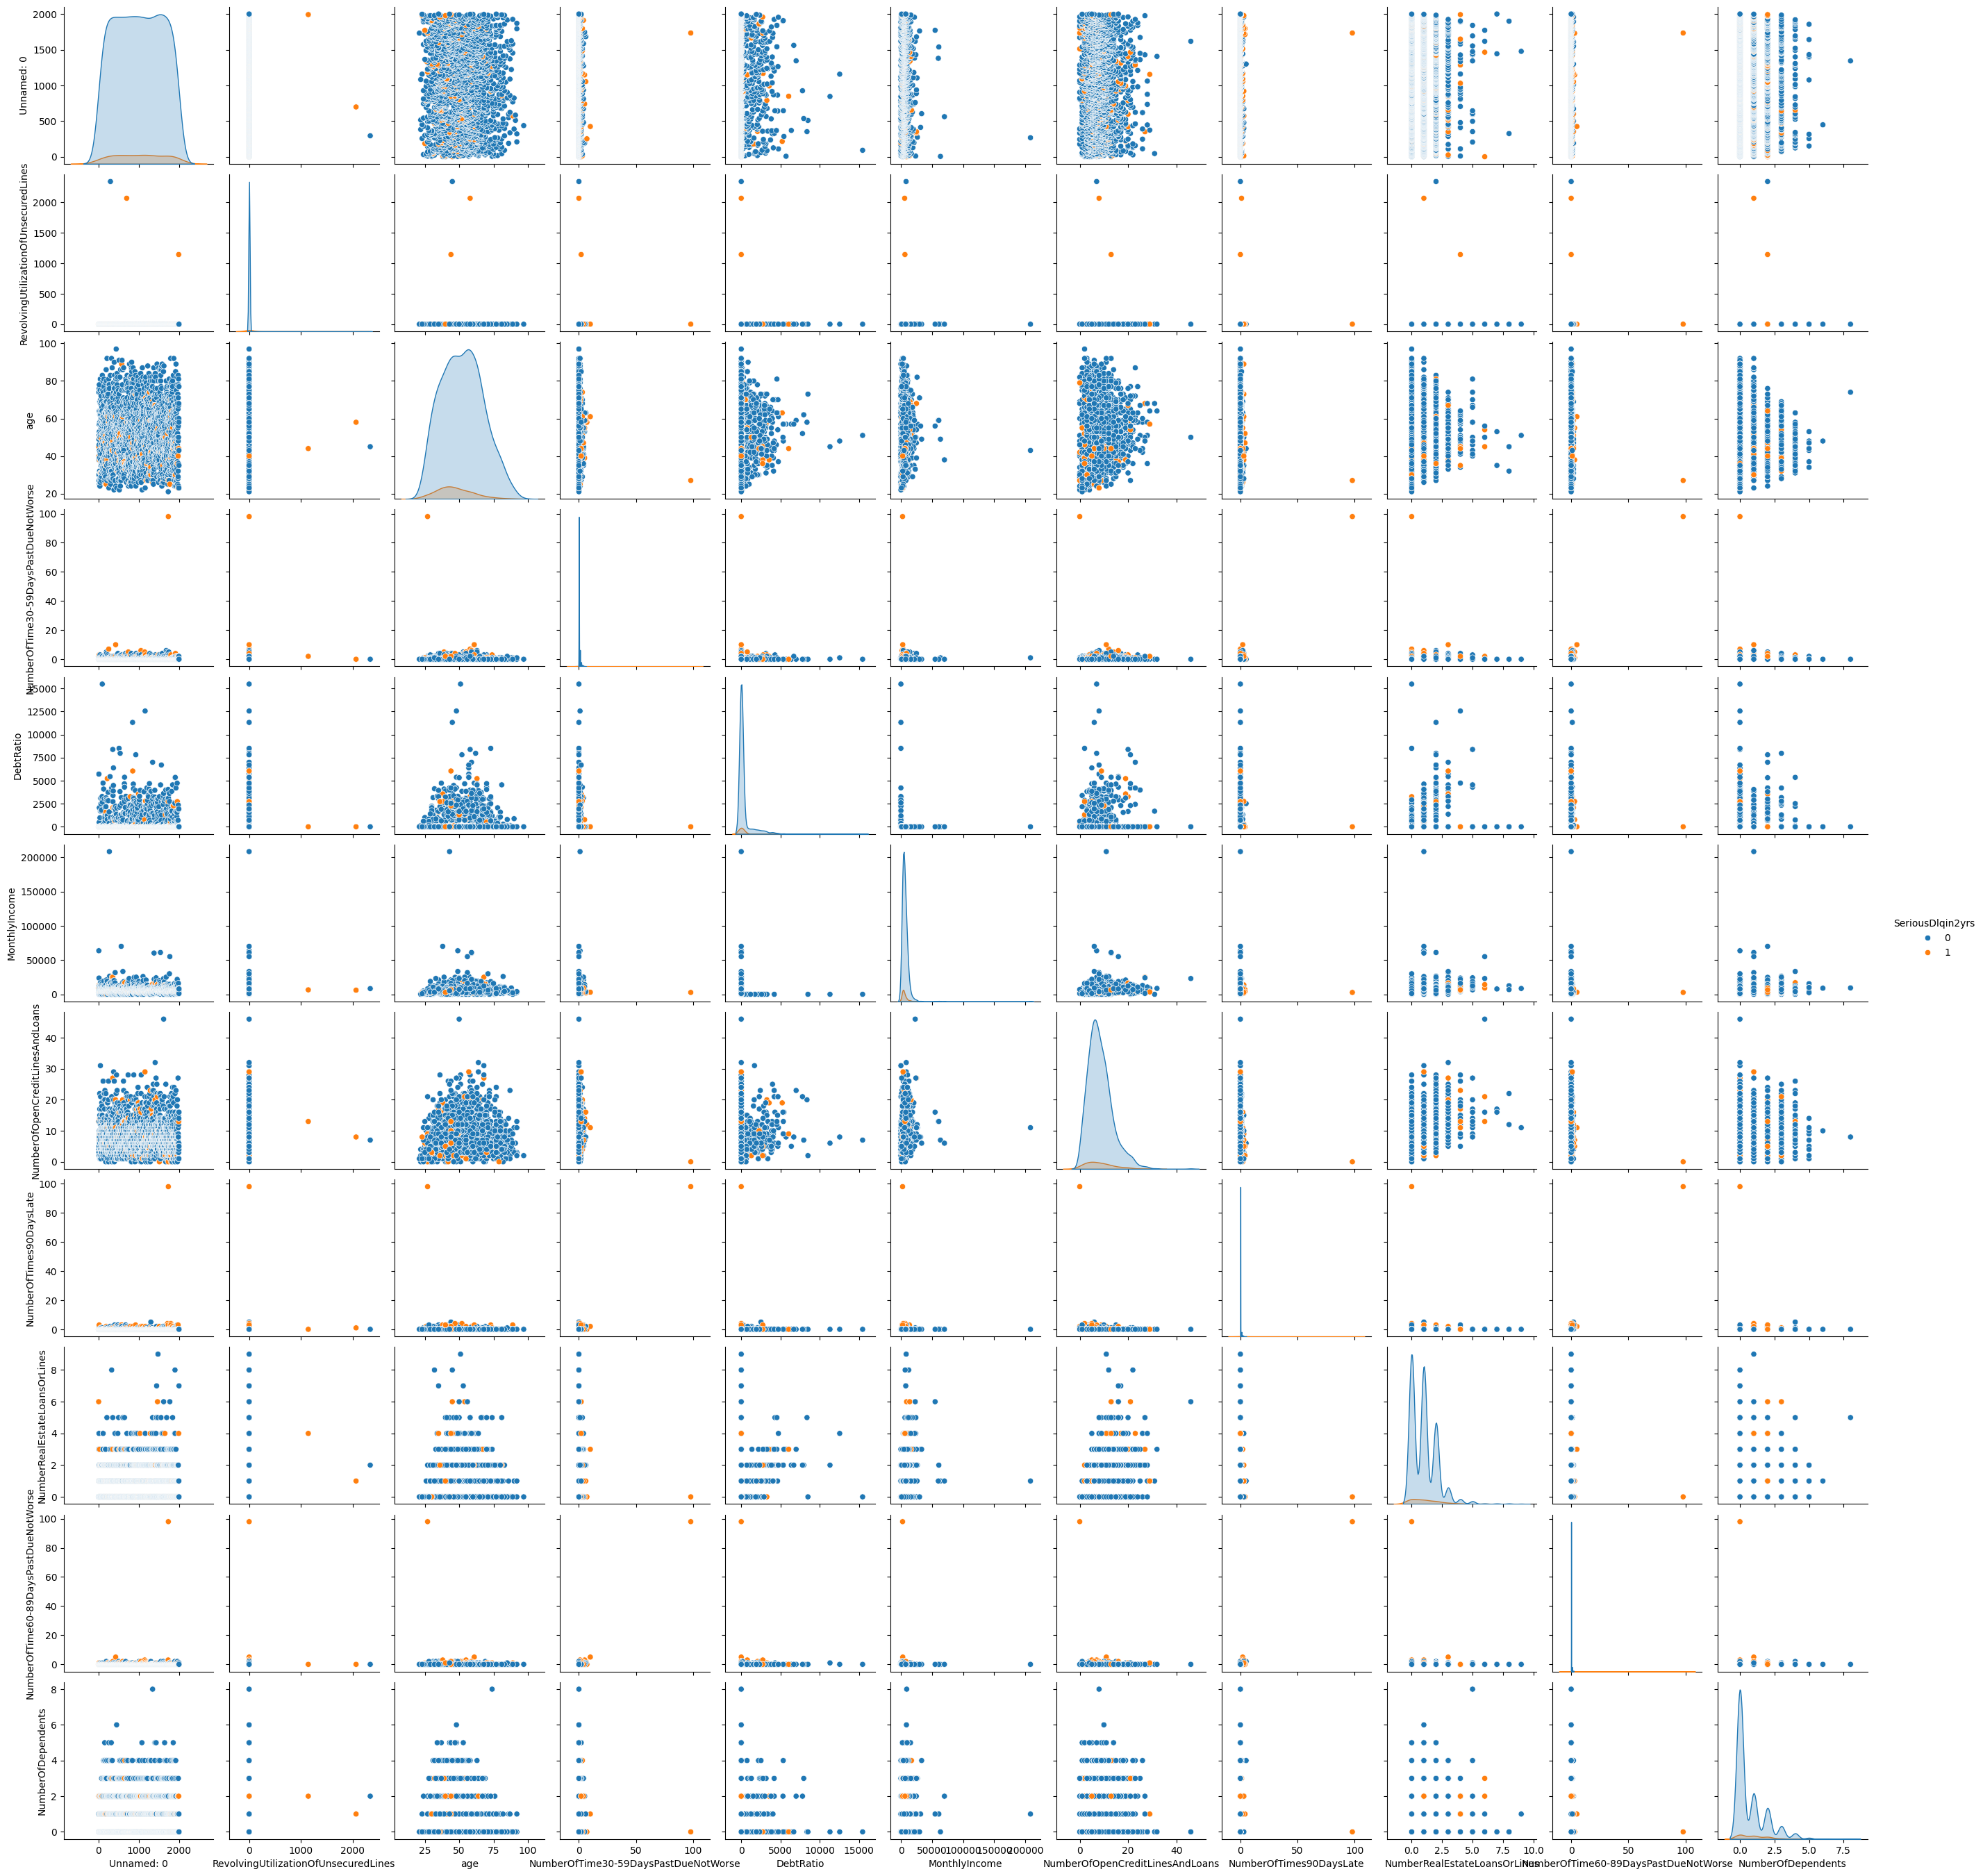

In [12]:
sns.pairplot(train.iloc[0:2000,:], hue='SeriousDlqin2yrs')

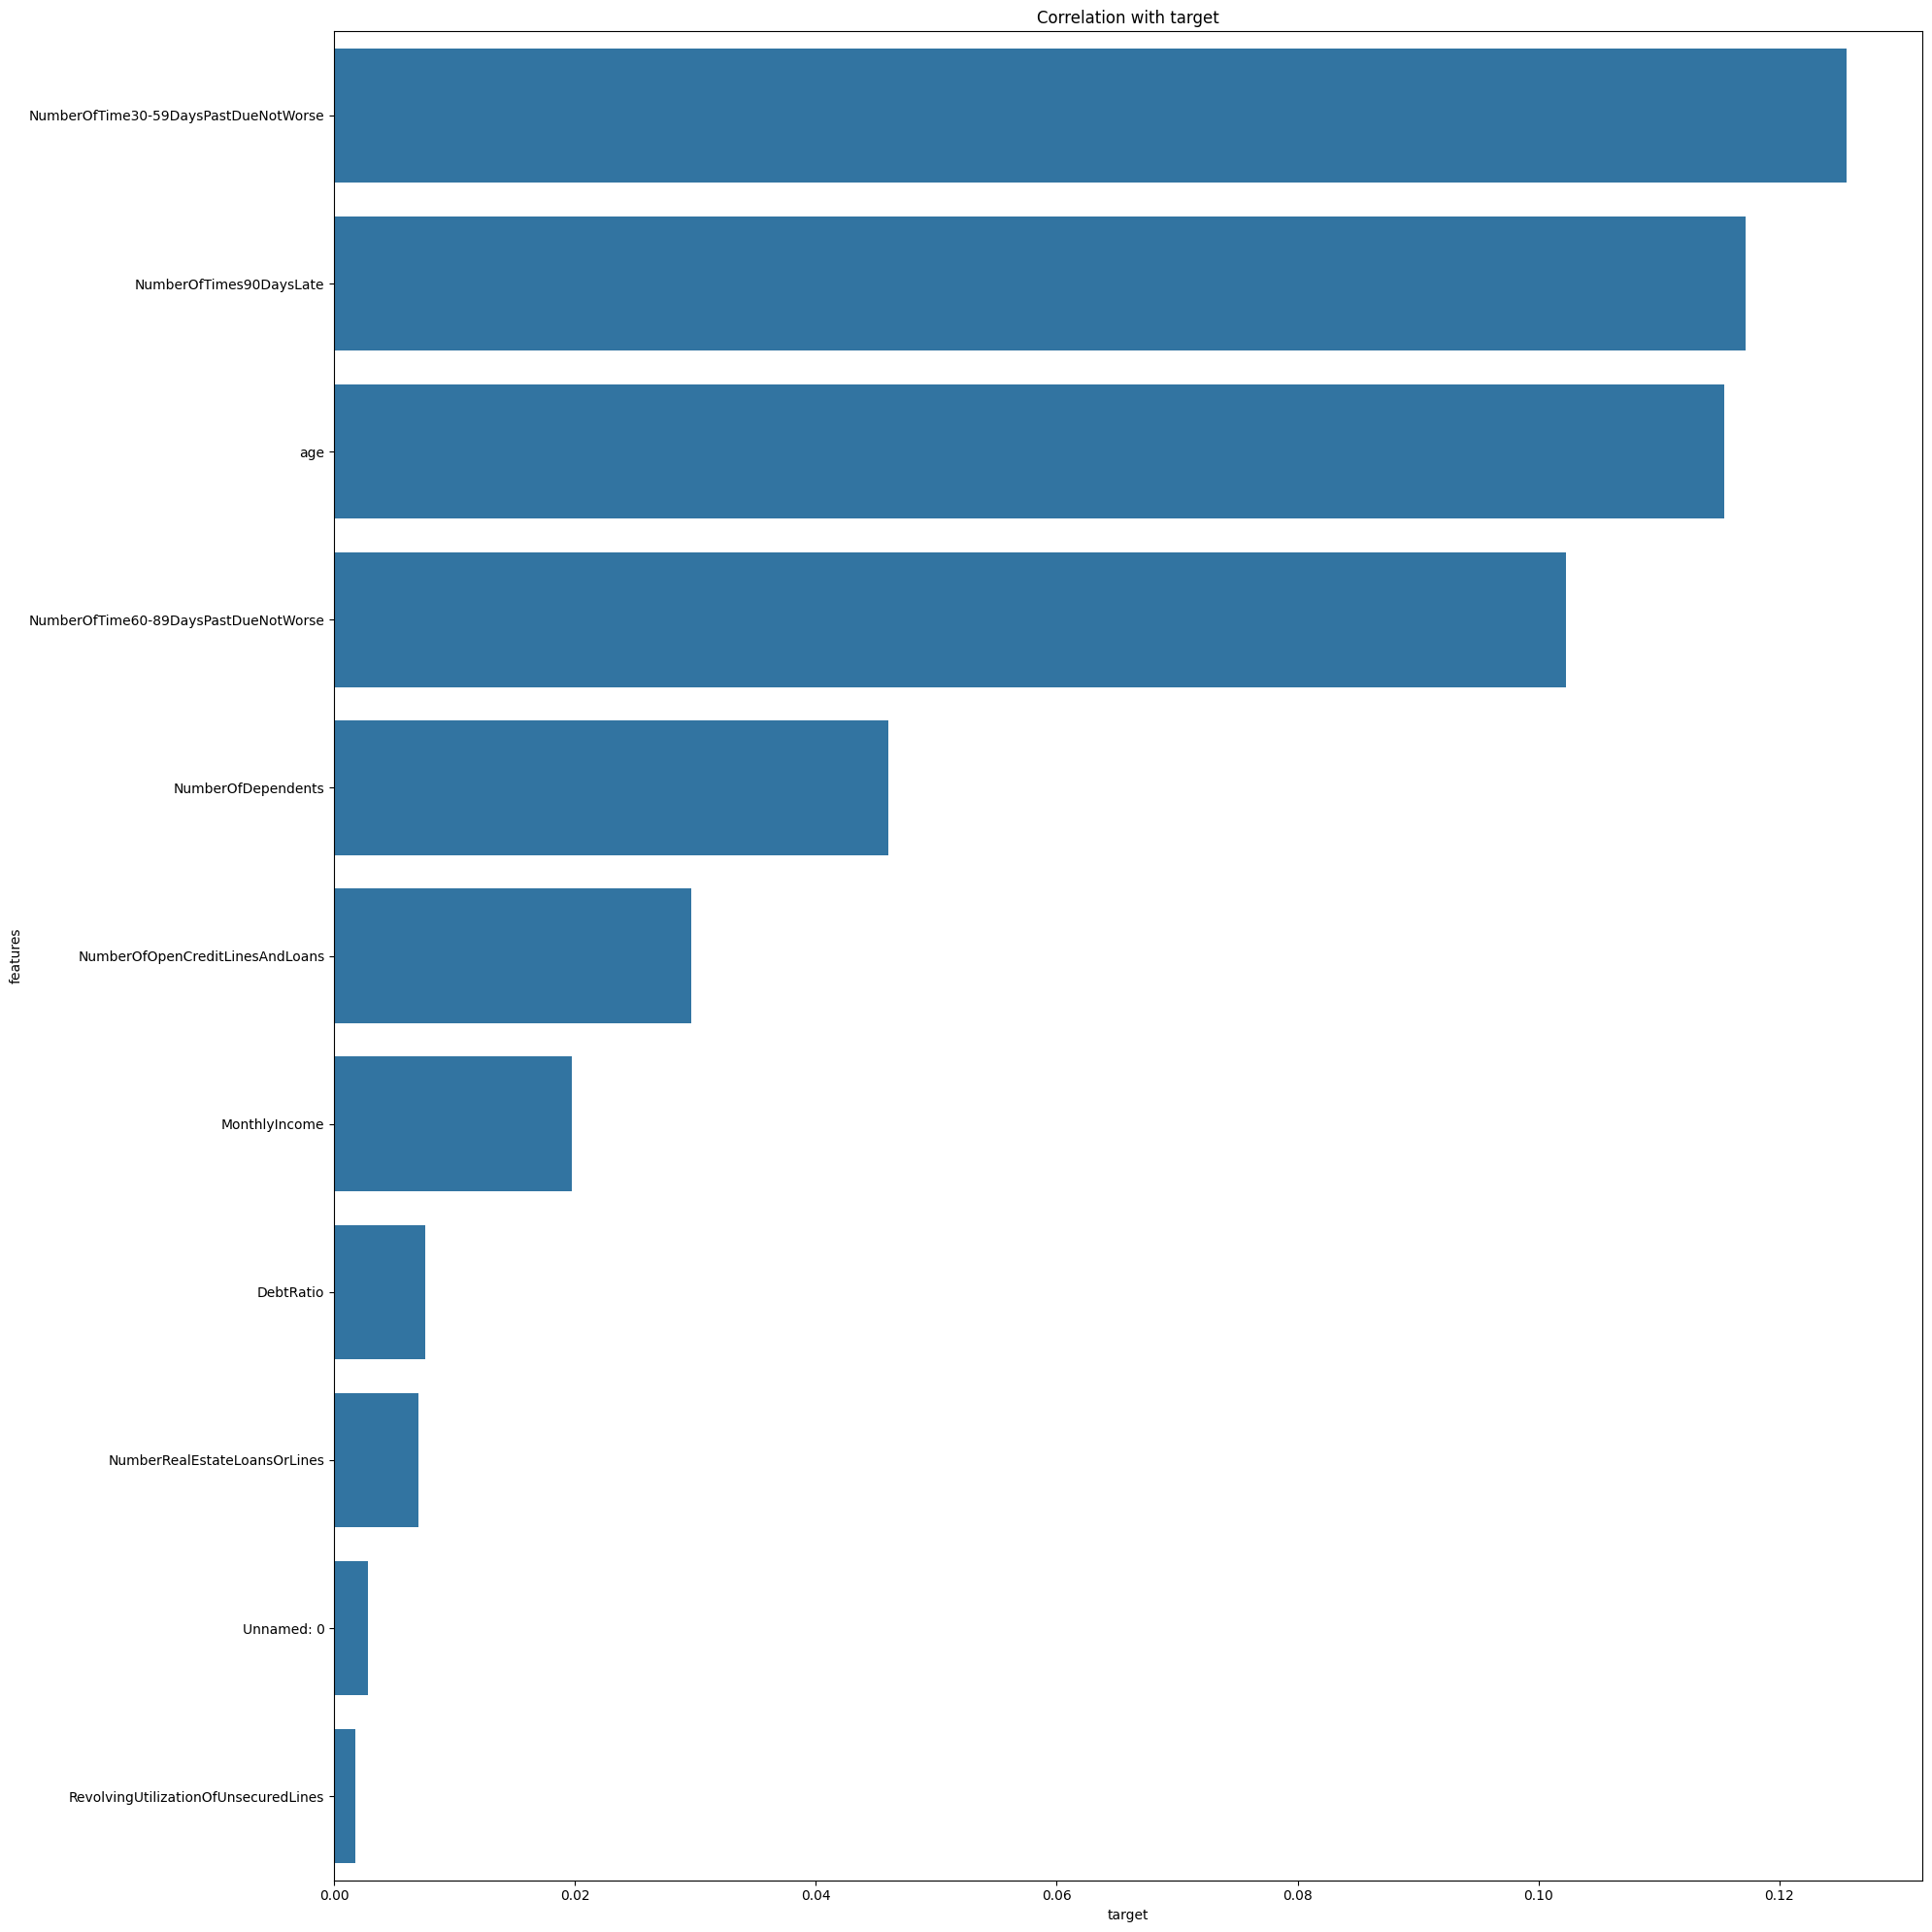

In [13]:
corrmat = train.corr()
corr_with_target = corrmat['SeriousDlqin2yrs'].apply(abs).sort_values(ascending=False)
corr_with_target.drop(['SeriousDlqin2yrs'], inplace=True)
df = pd.DataFrame(data={'features': corr_with_target.index, 'target': corr_with_target.values})
plt.figure(figsize=(20, 20))
sns.barplot(x="target", y="features", data=df)
plt.title('Correlation with target')
plt.tight_layout()
plt.show()

In [14]:
train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns] = train[train.select_dtypes(['int64','int16','float16','float32','float64','int8']).columns].apply(pd.to_numeric)
train[train.select_dtypes(['object','category']).columns] = train.select_dtypes(['object','category']).apply(lambda x: x.astype('category'))

In [15]:
y = train["SeriousDlqin2yrs"]
X = train.drop(['SeriousDlqin2yrs','Unnamed: 0'], axis='columns')
y.shape, X.shape

((150000,), (150000, 10))

In [16]:
cat_columns = X.select_dtypes(exclude=['int64','int16','float16','float32','float64','int8']).columns
num_columns = X.select_dtypes(include=['int64','int16','float16','float32','float64','int8']).columns
print(cat_columns)
print(num_columns)

Index([], dtype='object')
Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


<Figure size 640x480 with 0 Axes>

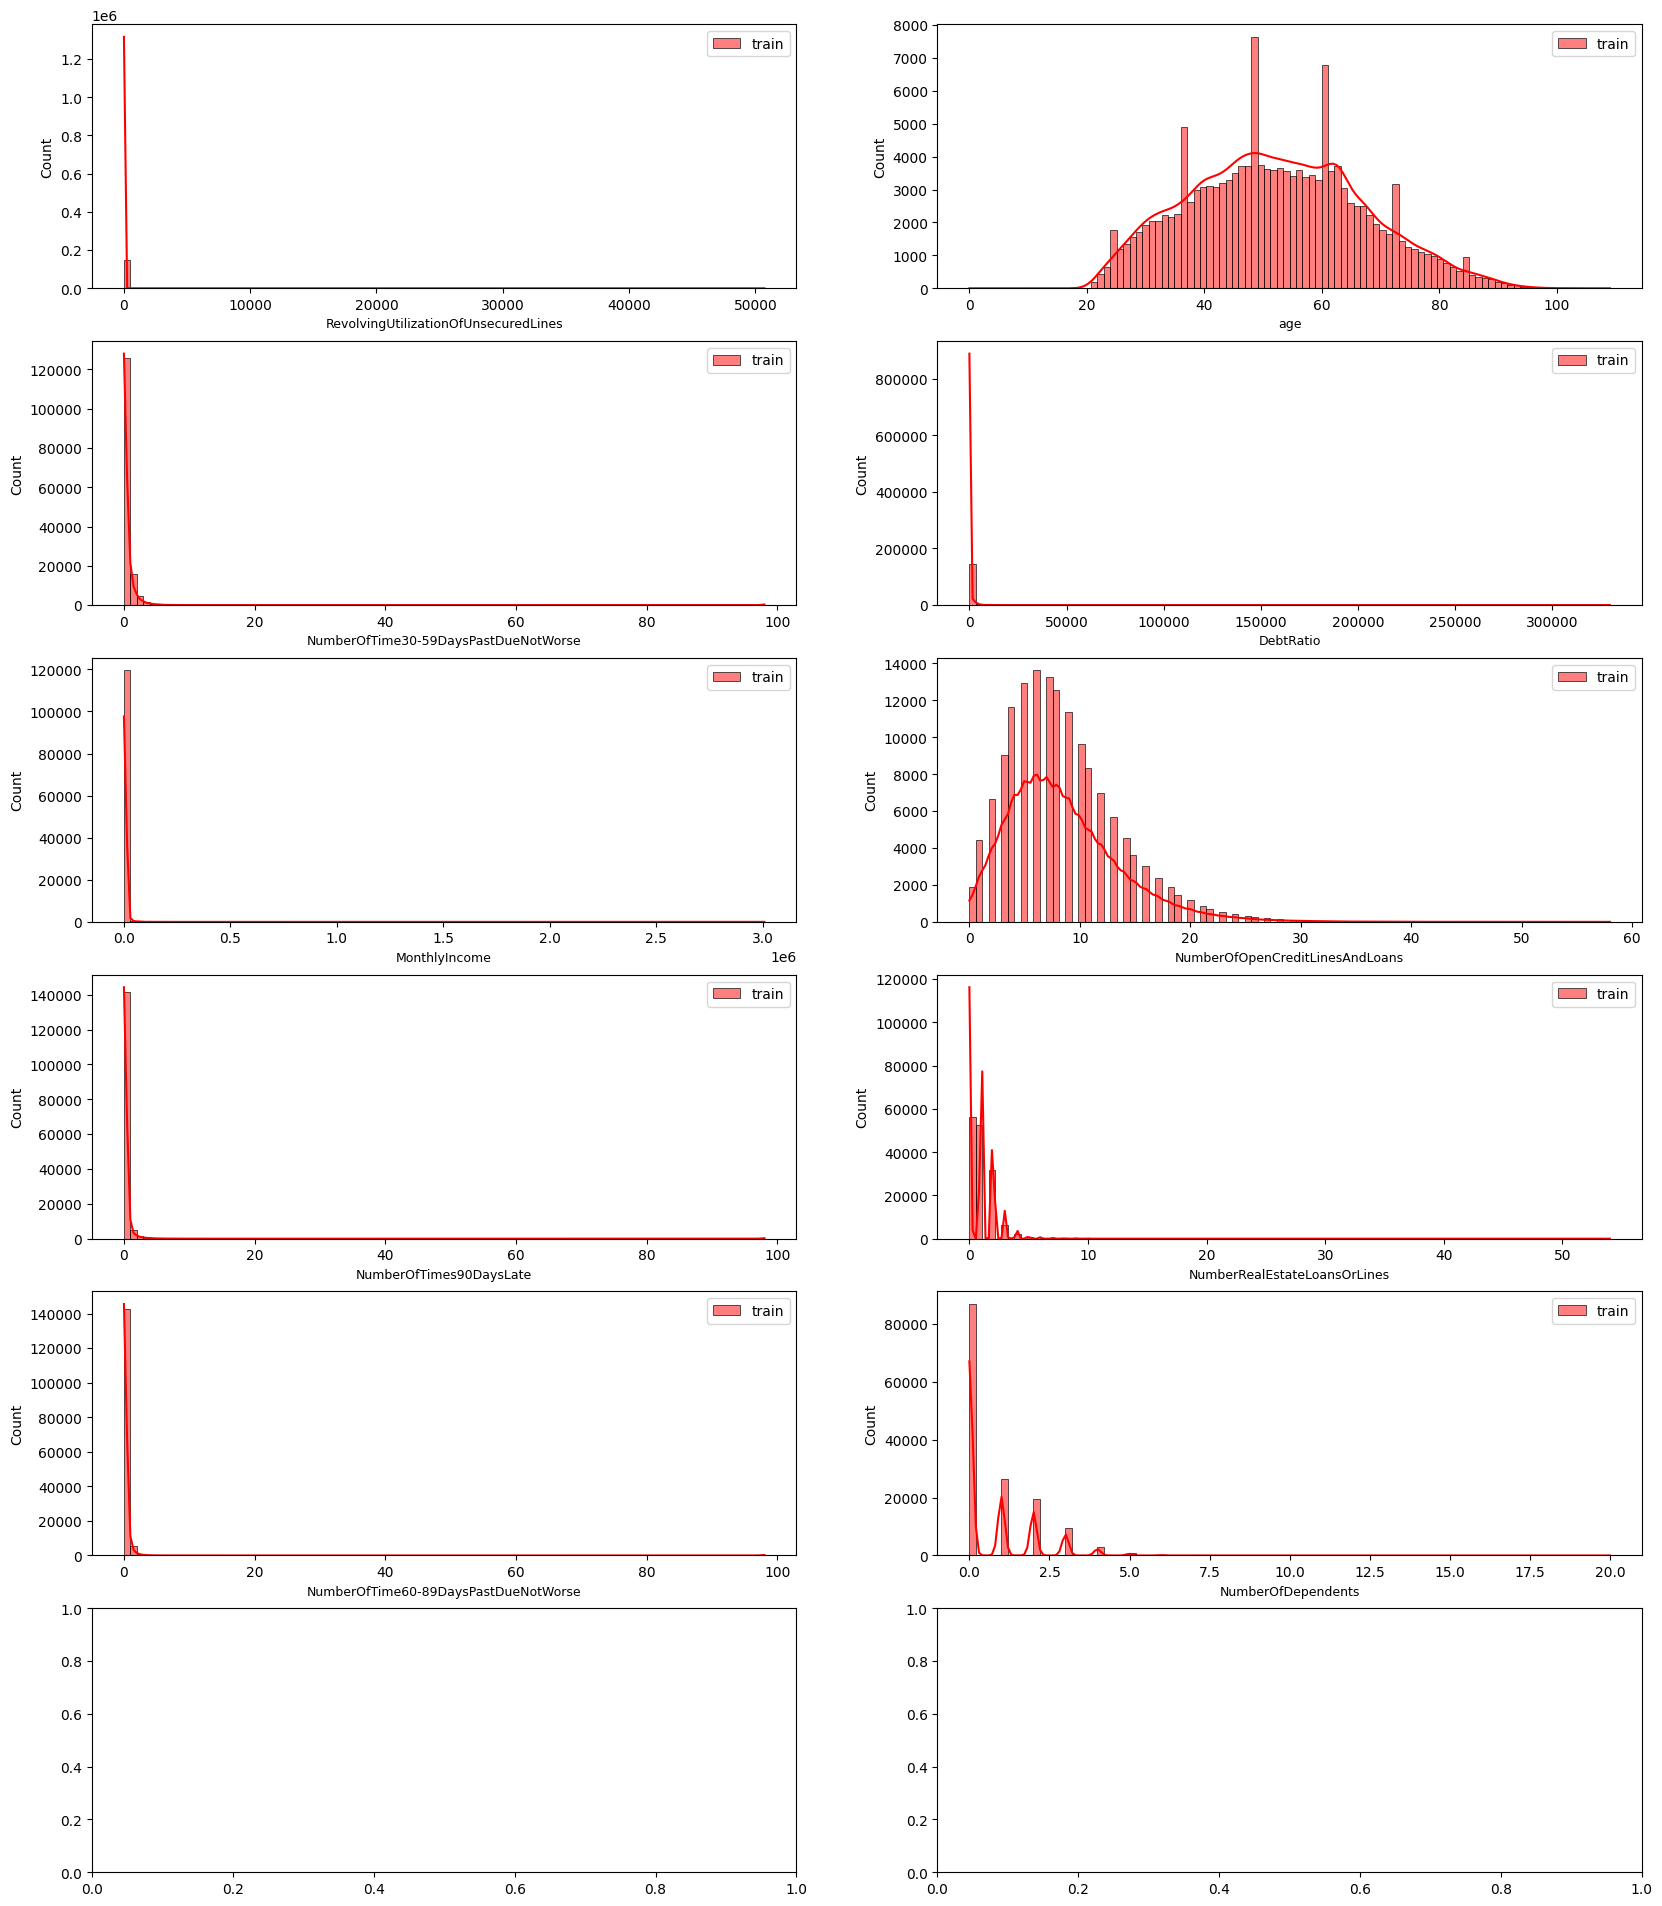

In [17]:
i = 1
plt.figure()
fig, ax = plt.subplots(6, 2, figsize=(20, 24))
for feature in num_columns:
    plt.subplot(6, 2, i)
    sns.histplot(train[feature],color="red", kde=True,bins=100, label='train')
    plt.xlabel(feature, fontsize=9); plt.legend()
    i += 1
plt.show()

In [18]:
train.SeriousDlqin2yrs.value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64

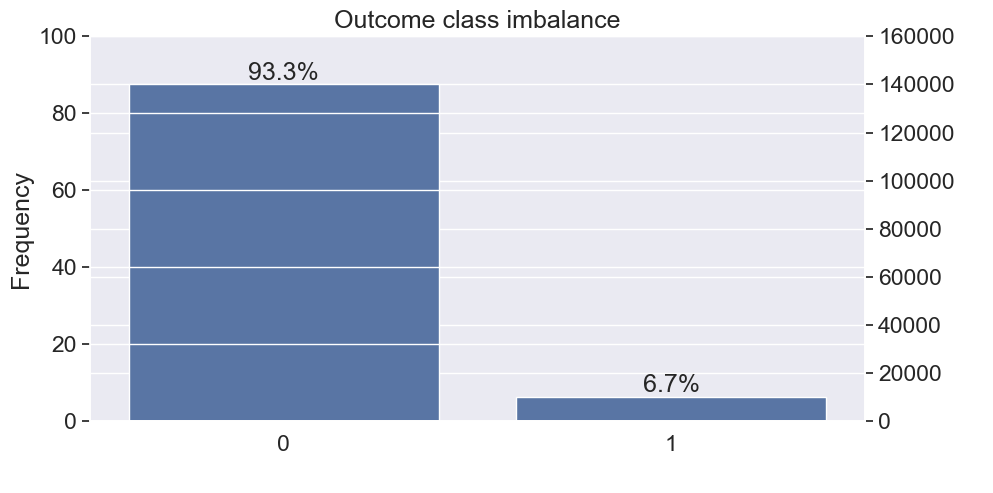

In [20]:
ax = sns.countplot(x = train.SeriousDlqin2yrs)
ax.set_ylim(top = 150000)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
ax.set_ylim(top=160000)

sns.set(font_scale=1.5)

fig = plt.gcf()
fig.set_size_inches(10,5)

ncount = len(train)
ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')
ax2.set_ylabel('Frequency')
plt.title('Outcome class imbalance')

for p in ax.patches:
    a=p.get_bbox().get_points()[:,0]
    b=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*b/ncount), (a.mean(), b), 
                ha='center', va='bottom')

    ax2.set_ylim(0,100)
    ax2.grid(None)

plt.show()

C:\Users\79641\AppData\Local\Temp\ipykernel_5300\3750751359.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(df_good, ax=ax[0],
C:\Users\79641\AppData\Local\Temp\ipykernel_5300\3750751359.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(df_bad, ax=ax[0],


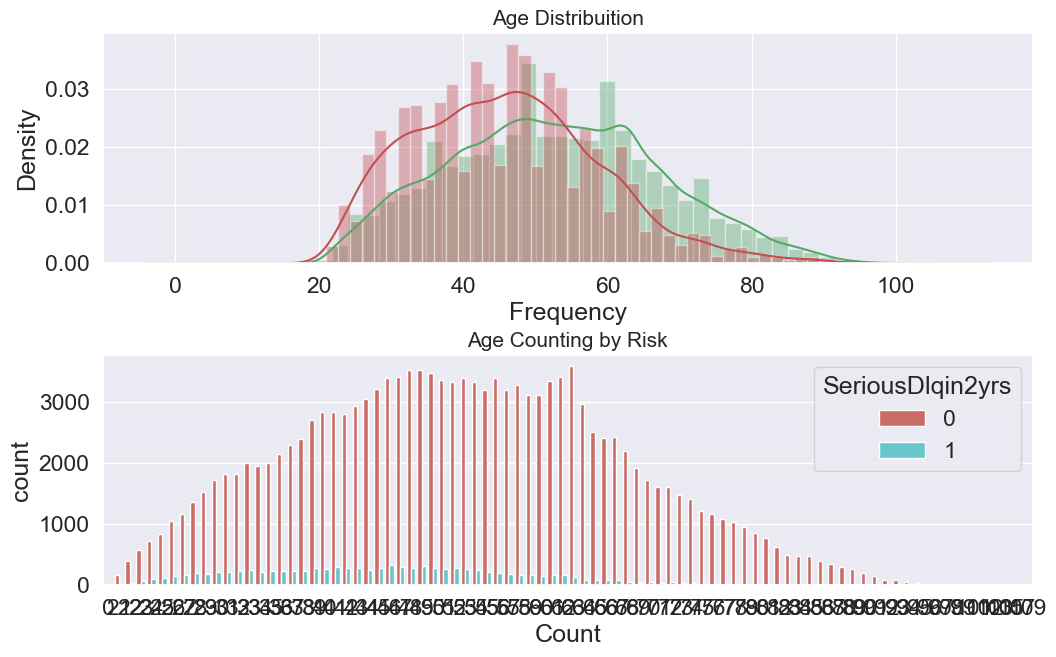

In [21]:
df_good = train.loc[train["SeriousDlqin2yrs"] == 0]['age'].values.tolist()
df_bad = train.loc[train["SeriousDlqin2yrs"] == 1]['age'].values.tolist()
df_age = train['age'].values.tolist()

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good, ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad, ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("Age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="age",data=train, 
              palette="hls", ax=ax[1], 
              hue = "SeriousDlqin2yrs")
g2.set_title("Age Counting by Risk", fontsize=15)
g2.set_xlabel("Age") 
g2.set_xlabel("Count")
plt.show()

In [22]:
from sklearn.impute import SimpleImputer

si = SimpleImputer(strategy='mean').fit(train[['MonthlyIncome']])

has_monthly_income_na = train['MonthlyIncome'].isna()
train['MonthlyIncome'] = si.transform(train[['MonthlyIncome']])

train.loc[has_monthly_income_na, 'DebtRatio'] = train.loc[has_monthly_income_na, 'DebtRatio']/train.loc[has_monthly_income_na, 'MonthlyIncome']

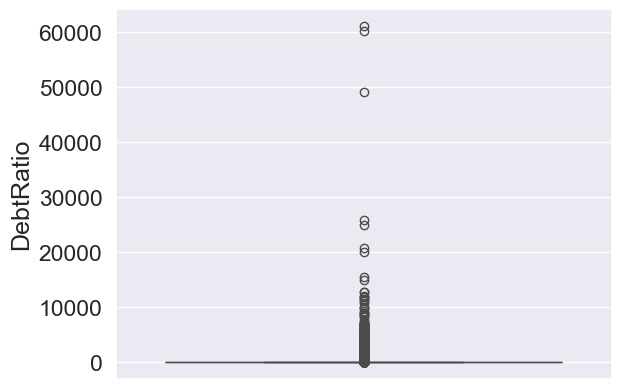

In [23]:
sns.boxplot(train['DebtRatio'])
plt.show()

In [24]:
def remove_outliers(df, column_name, iqr_multiplier = 2):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr
    df = df[(df[column_name] >= lower_bound) & \
            (df[column_name] <= upper_bound)]
    return df

train = remove_outliers(train, 'DebtRatio')

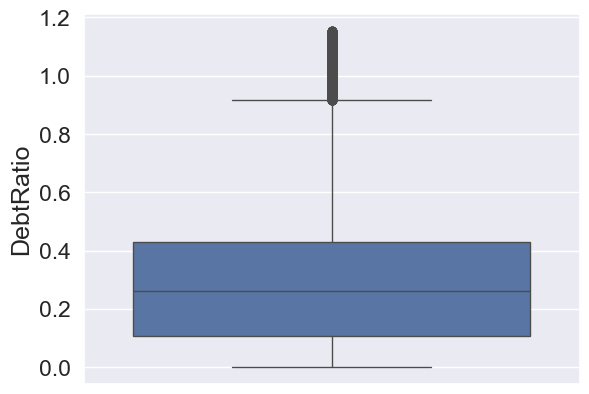

In [25]:
sns.boxplot(train['DebtRatio'])
plt.show()

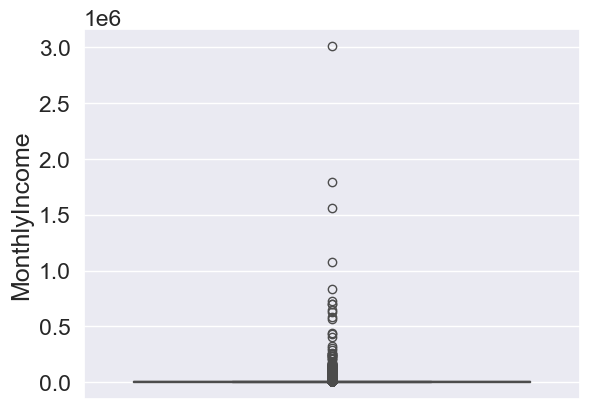

In [26]:
sns.boxplot(train['MonthlyIncome'])
plt.show()

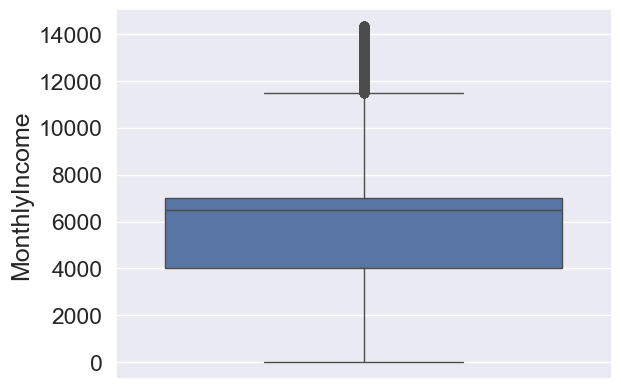

In [27]:
train = remove_outliers(train, 'MonthlyIncome')
sns.boxplot(train['MonthlyIncome'])
plt.show()

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score

In [29]:
X_cols = ['RevolvingUtilizationOfUnsecuredLines', 'age',
                    'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
                    'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
                    'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
                    'NumberOfDependents']

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("numerical", numeric_preprocessor, X_cols),
    ]
)
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('imputation_mean',
                                                  SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['RevolvingUtilizationOfUnsecuredLines', 'age',
                                  'NumberOfTime30-59DaysPastDueNotWorse',
                                  'DebtRatio', 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans',
                                  'NumberOfTimes90DaysLate',
                                  'NumberRealEstateLoansOrLines',
                                  'NumberOfTime60-89DaysPastDueNotWorse',
                                  'NumberOfDependents'])])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [31]:
X_train.head(), y_train.head()

(        RevolvingUtilizationOfUnsecuredLines  age  \
 69850                               0.423828   29   
 113844                              0.150879   81   
 37932                               0.033875   69   
 52111                               0.239624   53   
 92564                               0.566406   59   
 
         NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
 69850                                      0   0.015098        10000.0   
 113844                                     0   0.214225         3500.0   
 37932                                      1  10.248612          900.0   
 52111                                      0   0.193625        11325.0   
 92564                                      2   0.351705         3900.0   
 
         NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
 69850                                 2                        0   
 113844                                5                        0   
 37932         

In [32]:
rf = RandomForestClassifier(random_state=4)
lr = LogisticRegression(random_state=4)
models_to_try = [rf, lr]

In [33]:
all_pipelines = {}
for m in models_to_try:
    all_pipelines[m] = pipeline = make_pipeline(preprocessor, m)
    cross_val_scores = cross_val_score(pipeline, X_train, y_train, cv=4, scoring='roc_auc')
    print(m)
    print(f"Cross-Validation Scores: {cross_val_scores}")
    print(f"Mean Cross-Validation Score: {np.mean(cross_val_scores)}\n")

RandomForestClassifier(random_state=4)
Cross-Validation Scores: [0.83741305 0.83776963 0.83880264 0.83157471]
Mean Cross-Validation Score: 0.8363900065907617

LogisticRegression(random_state=4)
Cross-Validation Scores: [0.70759188 0.70342491 0.69902545 0.68260987]
Mean Cross-Validation Score: 0.6981630282019626



In [34]:
all_pipelines[rf].fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['RevolvingUtilizationOfUnsecuredLines',
                                                   'age',
                                                   'NumberOfTime30-59DaysPastDueNotWorse',
                                                   'DebtRatio', 'MonthlyIncome',
                                                   'NumberOfOpenCreditLinesAndLoans',
                                                   'NumberOfTimes90DaysLate',
                                                   'NumberRealEstateLoansOrLines',
                                                   'NumberOfTime60-89DaysPastDueNotWorse',
                                                   'NumberOfDependents'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=4))])

In [35]:
from sklearn.metrics import roc_auc_score

y_pred = all_pipelines[rf].predict_proba(X_test)[:, 1]
print(f'Test AUC of best model = {roc_auc_score(y_test, y_pred)}')

Test AUC of best model = 0.8438368301768882


In [36]:
all_pipelines[rf].fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['RevolvingUtilizationOfUnsecuredLines',
                                                   'age',
                                                   'NumberOfTime30-59DaysPastDueNotWorse',
                                                   'DebtRatio', 'MonthlyIncome',
                                                   'NumberOfOpenCreditLinesAndLoans',
                                                   'NumberOfTimes90DaysLate',
                                                   'NumberRealEstateLoansOrLines',
                                                   'NumberOfTime60-89DaysPastDueNotWorse',
                                                   'NumberOfDependents'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=4))])

In [37]:
has_monthly_income_na = test_df['MonthlyIncome'].isna()
test_df['MonthlyIncome'] = si.transform(test_df[['MonthlyIncome']])

test_df.loc[has_monthly_income_na, 'DebtRatio'] = test_df.loc[has_monthly_income_na, 'DebtRatio']/test_df.loc[has_monthly_income_na, 'MonthlyIncome']

In [38]:
test_df.isna().sum()

Unnamed: 0                                   0
SeriousDlqin2yrs                        101503
RevolvingUtilizationOfUnsecuredLines         0
age                                          0
NumberOfTime30-59DaysPastDueNotWorse         0
DebtRatio                                    0
MonthlyIncome                                0
NumberOfOpenCreditLinesAndLoans              0
NumberOfTimes90DaysLate                      0
NumberRealEstateLoansOrLines                 0
NumberOfTime60-89DaysPastDueNotWorse         0
NumberOfDependents                        2626
dtype: int64

In [40]:
test_df["SeriousDlqin2yrs"] = all_pipelines[rf].predict(test_df)

In [41]:
test_df['SeriousDlqin2yrs'].value_counts(normalize=True)

SeriousDlqin2yrs
0    0.9787
1    0.0213
Name: proportion, dtype: float64

In [42]:
sample_entry

,Id,Probability
0,1,0.080807
1,2,0.040719
2,3,0.011968
3,4,0.067640
4,5,0.108264
...,...,...
101498,101499,0.045363
101499,101500,0.343775
101500,101501,0.006970
101501,101502,0.121994


In [43]:
sample_entry['Probability'] = all_pipelines[rf].predict_proba(test_df)[:, 1]

In [44]:
sample_entry.to_csv('sampleEntry.csv', index=False)